In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

#------------------------------
#cpu - gpu configuration
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

#sess = tf.Session(config=config) 
#keras.backend.set_session(sess)
#------------------------------
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 128
epochs = 50
#------------------------------


with open("/content/drive/My Drive/Colab Notebooks/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
#------------------------------
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

fit = True

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/content/drive/My Drive/Colab Notebooks/dataset/facial_expression_model_weights.h5') #load weights
	
#------------------------------
"""
#overall evaluation
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', 100*score[1])
"""
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()
#------------------------------

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
128/128 [==============================] - 4s 33ms/step - loss: 1.8191 - accuracy: 0.2537
Epoch 2/50
128/128 [==============================] - 4s 34ms/step - loss: 1.8143 - accuracy: 0.2494
Epoch 3/50
128/128 [==============================] - 4s 32ms/step - loss: 1.7773 - accuracy: 0.2610
Epoch 4/50
128/128 [==============================] - 4s 33ms/step - loss: 1.6795 - accuracy: 0.3190
Epoch 5/50
128/128 [==============================] - 4s 32ms/step - loss: 1.6063 - accuracy: 0.3654
Epoch 6/50
128/128 [==============================] - 4s 33ms/step - loss: 1.5472 - accuracy: 0.3935
Epoch 7/50
128/128 [==============================] - 4s 33ms/step - loss: 1.4904 - accuracy: 0.4196
Epoch 8/50
128/128 [==============================] - 4s 33ms/step - loss: 1.4551 - accuracy: 0.4412
Epoch 9/50
128/128 [=======

In [ ]:
#Saving the model
model.save('/content/drive/My Drive/Colab Notebooks/final__model.h5')

In [ ]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.4251630902290344
Train accuracy: 85.0290834903717
Test loss: 1.6120837926864624
Test accuracy: 56.589579582214355


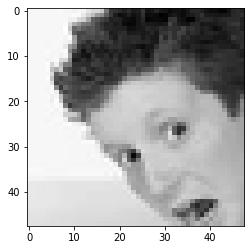

[3.0570175e-06 3.4336767e-10 2.6879278e-03 9.8312265e-01 1.2627486e-03
 1.6540927e-03 1.1269520e-02]


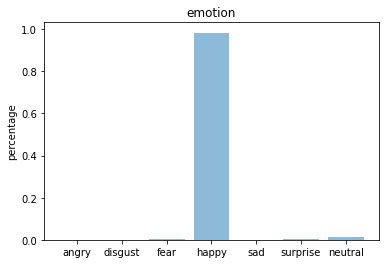

----------------------------------------------


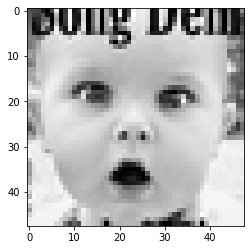

[6.7763690e-11 1.2213675e-18 1.2701593e-05 2.7352637e-08 3.2174891e-10
 9.9998724e-01 1.4638332e-11]


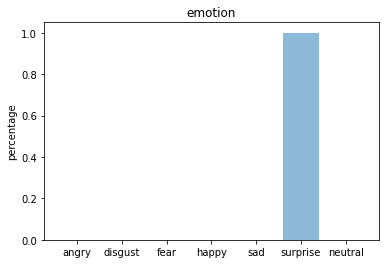

----------------------------------------------


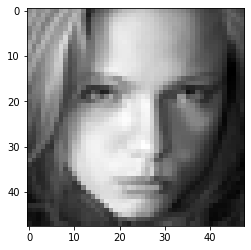

[4.0475901e-02 2.0952274e-07 8.7570021e-04 3.2986579e-03 3.4160994e-02
 7.2255502e-06 9.2118132e-01]


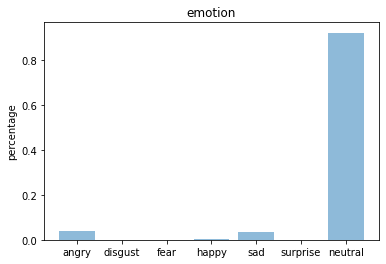

----------------------------------------------


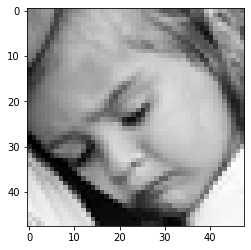

[2.4985399e-03 1.3067799e-04 8.4621388e-01 3.8992476e-02 7.6911241e-02
 6.7237765e-04 3.4580719e-02]


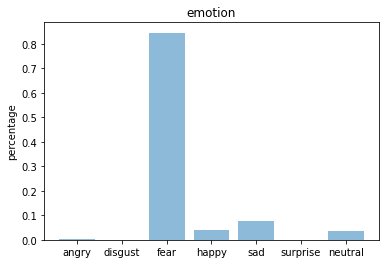

----------------------------------------------


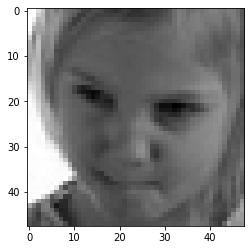

[9.7943193e-01 1.0575140e-03 3.4092187e-03 2.8545961e-05 1.2719756e-02
 1.5417600e-05 3.3376829e-03]


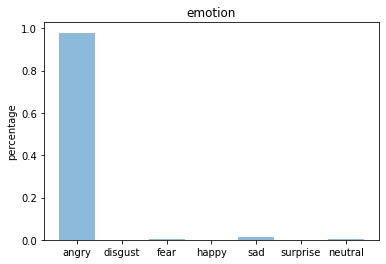

----------------------------------------------


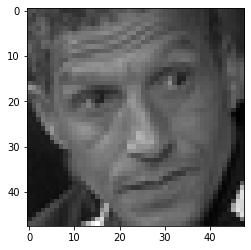

[0.29923576 0.00132394 0.11012884 0.00514063 0.24153657 0.01599859
 0.3266357 ]


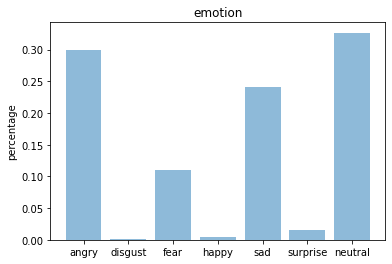

----------------------------------------------


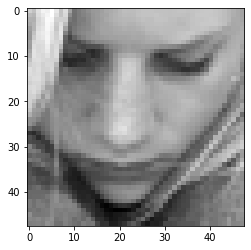

[7.89261144e-03 1.17671525e-03 8.85415450e-02 3.80302523e-03
 8.90967429e-01 1.24200415e-05 7.60620972e-03]


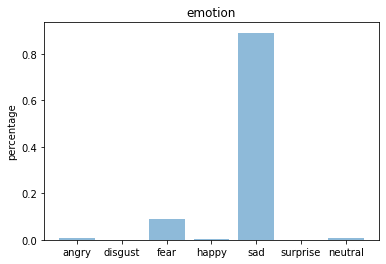

----------------------------------------------


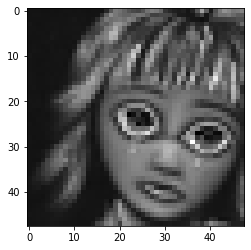

[5.5322409e-05 3.3690352e-08 1.2528659e-03 6.0280447e-05 9.9085289e-01
 1.7737070e-06 7.7768336e-03]


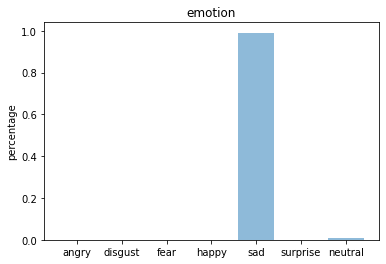

----------------------------------------------


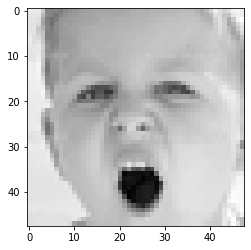

[7.33669102e-01 7.30395477e-05 9.20444429e-02 2.21053080e-04
 1.42015452e-02 1.48304984e-01 1.14859035e-02]


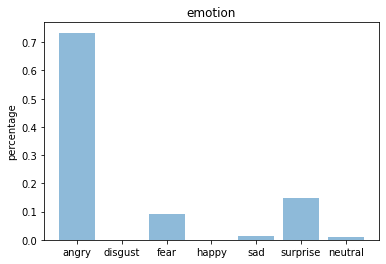

----------------------------------------------


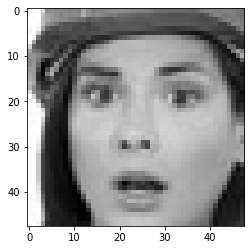

[2.3284296e-03 1.3624731e-05 9.6856155e-02 9.3137508e-04 6.8782317e-04
 8.9915699e-01 2.5569381e-05]


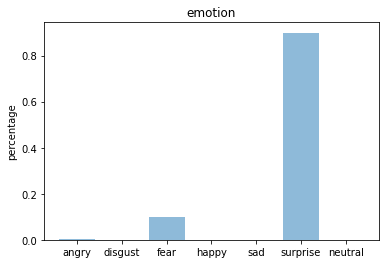

----------------------------------------------


In [ ]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores
			
			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);
			
			plt.gray()
			plt.imshow(testing_img)
			plt.show()
			
			print(i)
			
			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
 
pred_list = []; actual_list = []
 
for i in predictions:
 
  pred_list.append(np.argmax(i))
 
for i in y_test:
 
  actual_list.append(np.argmax(i))
 
confusion_matrix(actual_list, pred_list)

array([[254,   9,  42,  33,  54,  16,  59],
       [ 17,  26,   4,   0,   4,   2,   3],
       [ 83,   5, 173,  29,  92,  39,  75],
       [ 47,   2,  23, 706,  29,  13,  75],
       [127,   8,  99,  50, 241,  13, 115],
       [ 26,   1,  36,  21,  10, 304,  17],
       [ 77,   4,  38,  59,  92,  10, 327]])

In [ ]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


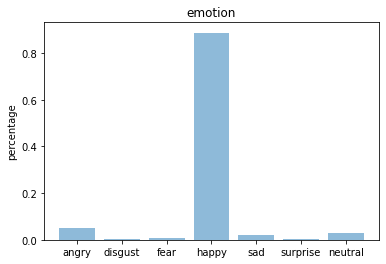

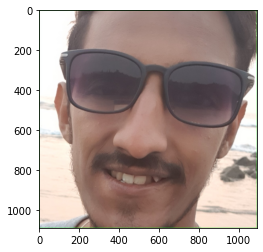

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'crop.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

In [ ]:
import cv2
            
def facecrop(image):  
    facedata = "/content/drive/My Drive/haarcascade_frontalface_default.xml"
    cascade = cv2.CascadeClassifier(facedata)

    img = cv2.imread(image)

    try:
    
        minisize = (img.shape[1],img.shape[0])
        miniframe = cv2.resize(img, minisize)

        faces = cascade.detectMultiScale(miniframe)

        for f in faces:
            x, y, w, h = [ v for v in f ]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

            sub_face = img[y:y+h, x:x+w]

            
            cv2.imwrite('crop.jpg', sub_face)
            #print ("Writing: " + image)

    except Exception as e:
        print (e)

    #cv2.imshow(image, img)


if __name__ == '__main__':
    facecrop('/content/20190115_171730.jpg')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'